# Example of using the orm classes

Imports

In [1]:
from os import remove
from utils.io import striplog_from_text
from core.project import Project
from core.orm import BoreholeOrm, PositionOrm, Base, LinkIntervalComponentOrm
from striplog import Lexicon, Striplog, Component
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

In [2]:
remove('./tmp_files/test_orm_db_2.db')

Create the db engine and the database structure

In [3]:
engine = create_engine('sqlite:///tmp_files/test_orm_db_2.db', echo=True)

In [4]:
Base.metadata.create_all(engine)

2021-04-03 23:51:07,472 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-04-03 23:51:07,474 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 23:51:07,475 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-04-03 23:51:07,476 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 23:51:07,477 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Boreholes")
2021-04-03 23:51:07,477 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 23:51:07,479 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Boreholes")
2021-04-03 23:51:07,481 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 23:51:07,481 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Positions")
2021-04-03 23:51:07,482 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 23:51:07,483 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Positions")
2021-04-03 23:51:07,484 INFO sqlalchemy.engine.base.Engine ()
2021-04-03

### Create the objects from las files

In [5]:
lexicon = Lexicon.default()

In [6]:
borehole_dict = {'F01':ROOT_DIR+'/data/test.las', 'F02':ROOT_DIR+'/data/test.csv'} # boreholes to insert into the db

In [7]:
int_id = 0
bh_id = 0
pos_id = 0
boreholes = []
components = []
comp_id = 0
component_dict={}
link_dict={}
pos_dict = {}
x = [0., 20.]
y = [0., 120.]

for bh, filename in borehole_dict.items():
    interval_number = 0
    boreholes.append(BoreholeOrm(id=bh))
    
    strip=striplog_from_text(filename)
    
    for c in strip.components:
        if c not in component_dict.keys():
            component_dict.update({c:comp_id})
            comp_id += 1
    d ={}
    for interval in strip:
        top = PositionOrm(id=pos_id, upper=interval.top.upper, 
                          middle=interval.top.middle,  
                          lower=interval.top.lower, 
                          x=x[bh_id], y=y[bh_id])
        
        base = PositionOrm(id=pos_id+1, upper=interval.base.upper, 
                           middle=interval.base.middle,  
                           lower=interval.base.lower, 
                           x=x[bh_id], y=y[bh_id])
        
        d.update({int_id:{'description':interval.description, 
                          'interval_number' : interval_number, 
                          'top': top, 'base': base
                         }})
        
        for i in interval.components:
            if i != Component({}):
                link_dict.update({(int_id, component_dict[i]) : {'extra_data': 'test'}})
        
        interval_number+=1
        int_id += 1
        pos_id += 2

 

    print(d)
    boreholes[bh_id].intervals_values = d
    #boreholes[bh_id].components_values = c
    bh_id += 1 
components = {v:k for k,v in component_dict.items()}

{0: {'description': 'Anhydrite', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f68eb443520>, 'base': <core.orm.PositionOrm object at 0x7f68eb46cc70>}, 1: {'description': 'Sandstone, grey, vf-f', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f68eb46cf40>, 'base': <core.orm.PositionOrm object at 0x7f68eb46cee0>}, 2: {'description': 'Anhydrite', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f68eb46cf10>, 'base': <core.orm.PositionOrm object at 0x7f68eb46c310>}, 3: {'description': 'Dolomite', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f68eb46cd30>, 'base': <core.orm.PositionOrm object at 0x7f68eb46c190>}, 4: {'description': 'Anhydrite', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f68eb46c0d0>, 'base': <core.orm.PositionOrm object at 0x7f68eb46c7c0>}, 5: {'description': 'Sandstone, grey, vf-f', 'interval_number': 5, 'top': <core.orm.PositionOrm object at 0x7f68eb46c070>, 'base': <core.orm.Position

In [8]:
link_dict

{(0, 1): {'extra_data': 'test'},
 (1, 2): {'extra_data': 'test'},
 (2, 1): {'extra_data': 'test'},
 (3, 3): {'extra_data': 'test'},
 (4, 1): {'extra_data': 'test'},
 (5, 2): {'extra_data': 'test'},
 (6, 4): {'extra_data': 'test'},
 (7, 3): {'extra_data': 'test'},
 (8, 0): {'extra_data': 'test'},
 (9, 3): {'extra_data': 'test'},
 (10, 2): {'extra_data': 'test'},
 (11, 3): {'extra_data': 'test'},
 (12, 2): {'extra_data': 'test'},
 (13, 0): {'extra_data': 'test'},
 (14, 3): {'extra_data': 'test'},
 (15, 0): {'extra_data': 'test'},
 (16, 3): {'extra_data': 'test'},
 (17, 0): {'extra_data': 'test'},
 (18, 3): {'extra_data': 'test'},
 (19, 0): {'extra_data': 'test'},
 (20, 3): {'extra_data': 'test'},
 (21, 0): {'extra_data': 'test'},
 (22, 3): {'extra_data': 'test'},
 (23, 5): {'extra_data': 'test'},
 (25, 1): {'extra_data': 'test'},
 (26, 2): {'extra_data': 'test'},
 (27, 4): {'extra_data': 'test'}}

Create the session

In [9]:
Session = sessionmaker(bind=engine)
session = Session()

Create the project

In [10]:
p = Project(session)
p.add_components(components)

2021-04-03 23:51:07,584 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 23:51:07,585 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 23:51:07,586 INFO sqlalchemy.engine.base.Engine ()
2021-04-03 23:51:07,588 INFO sqlalchemy.engine.base.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-04-03 23:51:07,589 INFO sqlalchemy.engine.base.Engine ((0, 'Siltstone, grey'), (1, 'Anhydrite'), (2, 'Sandstone, vf-f, grey'), (3, 'Dolomite'), (4, 'Siltstone, red'), (5, 'Limestone'))
2021-04-03 23:51:07,591 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 23:51:07,595 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 23:51:07,596 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021

In [11]:
boreholes

[<core.orm.BoreholeOrm>(id=F01, length=None, diameter=None, intervals=25),
 <core.orm.BoreholeOrm>(id=F02, length=None, diameter=None, intervals=3)]

Add boreholes into the database

In [12]:
for bh in boreholes:
    p.add_borehole(bh)

2021-04-03 23:51:07,609 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-04-03 23:51:07,610 INFO sqlalchemy.engine.base.Engine ('F01', 0.0, 0.0)
2021-04-03 23:51:07,612 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-04-03 23:51:07,613 INFO sqlalchemy.engine.base.Engine ((0, 14.3, 14.3, 14.3, 0.0, 0.0), (1, 51.24117647058824, 51.24117647058824, 51.24117647058824, 0.0, 0.0), (2, 51.24117647058824, 51.24117647058824, 51.24117647058824, 0.0, 0.0), (3, 54.81764705882354, 54.81764705882354, 54.81764705882354, 0.0, 0.0), (4, 54.81764705882354, 54.81764705882354, 54.81764705882354, 0.0, 0.0), (5, 56.55882352941177, 56.55882352941177, 56.55882352941177, 0.0, 0.0), (6, 56.55882352941177, 56.55882352941177, 56.55882352941177, 0.0, 0.0), (7, 58.86470588235295, 58.86470588235295, 58.86470588235295, 0.0, 0.0)  ... displaying 10 of 50 total bound parameter sets ...  (48, 

2021-04-03 23:51:07,667 INFO sqlalchemy.engine.base.Engine (14,)
2021-04-03 23:51:07,669 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 23:51:07,670 INFO sqlalchemy.engine.base.Engine (15,)
2021-04-03 23:51:07,672 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 23:51:07,673 INFO sqlalchemy.engine.base.Engine (16,)
2021-04-03 23:51:07,674 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

2021-04-03 23:51:07,720 INFO sqlalchemy.engine.base.Engine (35,)
2021-04-03 23:51:07,722 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 23:51:07,723 INFO sqlalchemy.engine.base.Engine (36,)
2021-04-03 23:51:07,725 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 23:51:07,726 INFO sqlalchemy.engine.base.Engine (37,)
2021-04-03 23:51:07,729 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

2021-04-03 23:51:07,820 INFO sqlalchemy.engine.base.Engine (51,)
2021-04-03 23:51:07,821 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 23:51:07,822 INFO sqlalchemy.engine.base.Engine (52,)
2021-04-03 23:51:07,824 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-04-03 23:51:07,824 INFO sqlalchemy.engine.base.Engine (53,)
2021-04-03 23:51:07,829 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

In [13]:
p.add_link_between_components_and_intervals(link_dict)

2021-04-03 23:51:07,878 INFO sqlalchemy.engine.base.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-04-03 23:51:07,879 INFO sqlalchemy.engine.base.Engine ((0, 1, 'test'), (1, 2, 'test'), (2, 1, 'test'), (3, 3, 'test'), (4, 1, 'test'), (5, 2, 'test'), (6, 4, 'test'), (7, 3, 'test')  ... displaying 10 of 27 total bound parameter sets ...  (26, 2, 'test'), (27, 4, 'test'))
2021-04-03 23:51:07,881 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-04-03 23:51:07,881 INFO sqlalchemy.engine.base.Engine (6.0, 'F02')
2021-04-03 23:51:07,882 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-03 23:51:07,886 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 23:51:07,886 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-04-03 23:51:07,887 INFO sqlalchemy.engin

In [14]:
p.boreholes[0].id

'F01'

In [15]:
p.commit()

2021-04-03 23:51:07,898 INFO sqlalchemy.engine.base.Engine COMMIT


In [16]:
p.boreholes[0].intervals[0].description

2021-04-03 23:51:07,902 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-03 23:51:07,903 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-04-03 23:51:07,904 INFO sqlalchemy.engine.base.Engine ('F01',)
2021-04-03 23:51:07,905 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-04-03 23:51:07,906 INFO sqlalchemy.engine.base.Engine ('F01',)


'Anhydrite'

In [17]:
p.boreholes[0].intervals[0]

In [18]:
session.close()

2021-04-03 23:51:07,916 INFO sqlalchemy.engine.base.Engine ROLLBACK


In [19]:
p.boreholes_3d[0].intervals

[Interval({'top': Position({'middle': 14.3, 'x': 0.0, 'y': 0.0, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'x': 0.0, 'y': 0.0, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}),
 Interval({'top': Position({'middle': 51.24117647058824, 'x': 0.0, 'y': 0.0, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'x': 0.0, 'y': 0.0, 'units': 'm'}), 'description': 'Sandstone, grey, vf-f', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'})]}),
 Interval({'top': Position({'middle': 54.81764705882354, 'x': 0.0, 'y': 0.0, 'units': 'm'}), 'base': Position({'middle': 56.55882352941177, 'x': 0.0, 'y': 0.0, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}),
 Interval({'top': Position({'middle': 56.55882352941177, 'x': 0.0, 'y': 0.0, 'units': 'm'}), 'base': Position({'middle': 58.86470588235295, 'x'

In [20]:
p.plot3d(x3d=True)

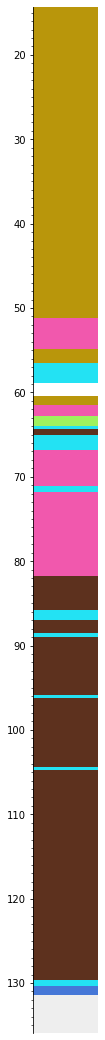

In [21]:
p.boreholes_3d[0].plot()